In [1]:
import numpy as np 
import pandas as pd
import json

In [2]:
products=pd.read_csv('amazon_baby_subset.csv')

In [3]:
imp_words=json.load(open('important_words.json'))

In [4]:
train_index_json= json.load(open('module-4-assignment-train-idx.json'))
validation_index_json= json.load(open('module-4-assignment-validation-idx.json'))

In [18]:
train=products.iloc[train_index_json]
valid=products.iloc[validation_index_json]

In [6]:
products=products.fillna({"review":""})

In [9]:
# data cleaning

def remove_punctuation(text):
    import string 
    import re
    punctuation=string.punctuation
    clean=re.sub(r'[{}]'.format(punctuation),'',text)
    return clean

In [10]:
products["review_clean"]=products['review'].apply(remove_punctuation)

In [11]:
products.shape

(53072, 5)

In [13]:
# words distribution for each word in every review
for word in imp_words:
    products[word]=products['review_clean'].apply(lambda s: s.split().count(word))

In [16]:
def get_data(dataframe, features, label):
    
    dataframe["constant"]=1
    features = ["constant"] + features
    
    features_frame=dataframe[features]
    feature_matrix=features_frame.as_matrix()
    
    label_sarray=dataframe[label]
    label_array= label_sarray.as_matrix()
    
    return(feature_matrix, label_array)

In [19]:
feature_matrix_train, sentiment_train = get_data(train, imp_words, 'sentiment')
feature_matrix_valid, sentiment_valid= get_data(valid, imp_words, "sentiment")

C:\Users\Ederson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
feature_matrix_train.shape

(42361, 194)

# Implementation of L2 in Logistic regressioin from scratch

In [21]:
def predict_probabilty(feature_matrix, coeff):
    score=np.dot(feature_matrix, coeff)
    prediction=1. / (1+np.exp(-score))
    return prediction

## write function that computes the deivative pf log likelyhood


In [24]:
def feature_derivative_l2(errors, feature, coeff, l2, feature_is_constant):
    derivative=np.dot(errors,feature)
    if not feature_is_constant: # feature is False then do this 
        derivative -= (2* l2 * coeff)
    return derivative

In [243]:
def compute_log_likelihood_L2(feature_matrix, sentiment, coeff, l2):
    
    indicator = (sentiment ==+1)
    scores = np.dot(feature_matrix, coeff)
    
    lp= np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2*np.sum(coeff[1:]**2)
    return lp
    

## write logistic regression with l2 function 

In [244]:
def logistic_regression_L2(feature_matrix, sentiment, initial_coeff,
                           step_size, l2, max_iter):
    coeff=np.array(initial_coeff)
    for itr in range(max_iter):
        predictions=predict_probabilty(feature_matrix, coeff)
        
        indicator= (sentiment==+1)
        errors= indicator - predictions
        
        for j in range(len(coeff)):
            is_intercept = (j==0)
            derivative=feature_derivative_l2(errors, feature_matrix[:,j], coeff[j],l2 , is_intercept)
            coeff[j]+=step_size*derivative
        
        if itr <= 15 or (itr <=100 and itr % 10 == 0) or ( itr<=1000 and itr % 100==0) or (itr <=10000 and itr % 1000==0) or (itr % 10000 == 0):
            lp= compute_log_likelihood_L2(feature_matrix, sentiment, coeff, l2)
            print('iteration {}: log likelihood of observed labels = {:.8f}'.format( itr, lp))
            
    return coeff
            

In [28]:
#params to test it with
coeff_0_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':0.,
                 'max_iter': 501}

coeff_4_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':4.,
                 'max_iter': 501}
coeff_10_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':10.,
                 'max_iter': 501}

coeff_1e2_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':1e2,
                 'max_iter': 501}

coeff_1e3_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':1e3,
                 'max_iter': 501}
coeff_1e5_L2={'feature_matrix': feature_matrix_train,
                 'sentiment': sentiment_train,
                 'initial_coeff': np.zeros(194),
                 'step_size': 5e-6,
                 'l2':1e5,
                 'max_iter': 501}

In [ ]:
def various_logit()

In [29]:
l2_0=logistic_regression_L2(**coeff_0_L2)
l2_4=logistic_regression_L2(**coeff_4_L2)
l2_10=logistic_regression_L2(**coeff_10_L2)
l2_1e2=logistic_regression_L2(**coeff_1e2_L2)
l2_1e3=logistic_regression_L2(**coeff_1e3_L2)
l2_1e5=logistic_regression_L2(**coeff_1e5_L2)

iteration 0: log likelihood of observed labels = -29179.39138303
iteration 1: log likelihood of observed labels = -29003.71259047
iteration 2: log likelihood of observed labels = -28834.66187288
iteration 3: log likelihood of observed labels = -28671.70781507
iteration 4: log likelihood of observed labels = -28514.43078198
iteration 5: log likelihood of observed labels = -28362.48344665
iteration 6: log likelihood of observed labels = -28215.56713122
iteration 7: log likelihood of observed labels = -28073.41743783
iteration 8: log likelihood of observed labels = -27935.79536396
iteration 9: log likelihood of observed labels = -27802.48168669
iteration 10: log likelihood of observed labels = -27673.27331484
iteration 11: log likelihood of observed labels = -27547.98083656
iteration 12: log likelihood of observed labels = -27426.42679977
iteration 13: log likelihood of observed labels = -27308.44444728
iteration 14: log likelihood of observed labels = -27193.87673876
iteration 15: log li

iteration 9: log likelihood of observed labels = -27935.93902900
iteration 10: log likelihood of observed labels = -27831.15045502
iteration 11: log likelihood of observed labels = -27731.59955260
iteration 12: log likelihood of observed labels = -27636.98108219
iteration 13: log likelihood of observed labels = -27547.01092670
iteration 14: log likelihood of observed labels = -27461.42422295
iteration 15: log likelihood of observed labels = -27379.97375625
iteration 20: log likelihood of observed labels = -27027.18208317
iteration 30: log likelihood of observed labels = -26527.22737267
iteration 40: log likelihood of observed labels = -26206.59048765
iteration 50: log likelihood of observed labels = -25995.96903148
iteration 60: log likelihood of observed labels = -25854.95710284
iteration 70: log likelihood of observed labels = -25759.08109950
iteration 80: log likelihood of observed labels = -25693.05688014
iteration 90: log likelihood of observed labels = -25647.09929349
iteration 1

# Q 3 Which of the following words is not listed in either positive_words or negative_words?

In [31]:
table=pd.DataFrame({'word':['(intercept)'] + imp_words})
def add_coeff_table(coeff, column_name):
    table[column_name]= coeff
    return table

In [32]:
add_coeff_table(l2_0, 'L2=0')
add_coeff_table(l2_4, 'L2=4')
add_coeff_table(l2_10, 'L2=10')
add_coeff_table(l2_1e2, 'L2=1e2')
add_coeff_table(l2_1e3, 'L2=1e3')
add_coeff_table(l2_1e5, 'L2=1e5')

,word,L2=0,L2=4,L2=10,L2=1e2,L2=1e3,L2=1e5
0,(intercept),-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
5,use,-0.000104,0.000163,0.000556,0.005481,0.017326,0.000418
6,would,-0.287021,-0.286027,-0.284564,-0.265993,-0.188662,-0.008127
7,like,-0.003384,-0.003442,-0.003527,-0.004635,-0.007043,-0.000827
8,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
9,little,0.524419,0.521385,0.516917,0.460235,0.251221,0.005941


In [66]:
pos_words=table.sort_values(by='L2=0',axis=0,ascending=False)[:5].reset_index(drop=True)

In [67]:
neg_words=table.sort_values(by='L2=0',axis=0,ascending=True)[:5].reset_index(drop=True)

In [68]:
pos_words

,word,L2=0,L2=4,L2=10,L2=1e2,L2=1e3,L2=1e5
0,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
1,loves,1.052484,1.043903,1.031265,0.870794,0.345870,0.006150
2,easy,0.984559,0.977600,0.967362,0.838245,0.401904,0.008808
3,perfect,0.835693,0.828555,0.818038,0.684143,0.250614,0.003989
4,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950


In [69]:
neg_words

,word,L2=0,L2=4,L2=10,L2=1e2,L2=1e3,L2=1e5
0,disappointed,-0.955437,-0.946980,-0.934518,-0.775625,-0.266095,-0.004013
1,money,-0.768793,-0.762734,-0.753818,-0.641406,-0.275883,-0.005487
2,return,-0.742085,-0.735502,-0.725807,-0.602646,-0.215199,-0.003730
3,waste,-0.617809,-0.612475,-0.604620,-0.505189,-0.190631,-0.003345
4,returned,-0.572707,-0.567518,-0.559870,-0.462056,-0.150021,-0.002225


# Plot Coeff Path

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


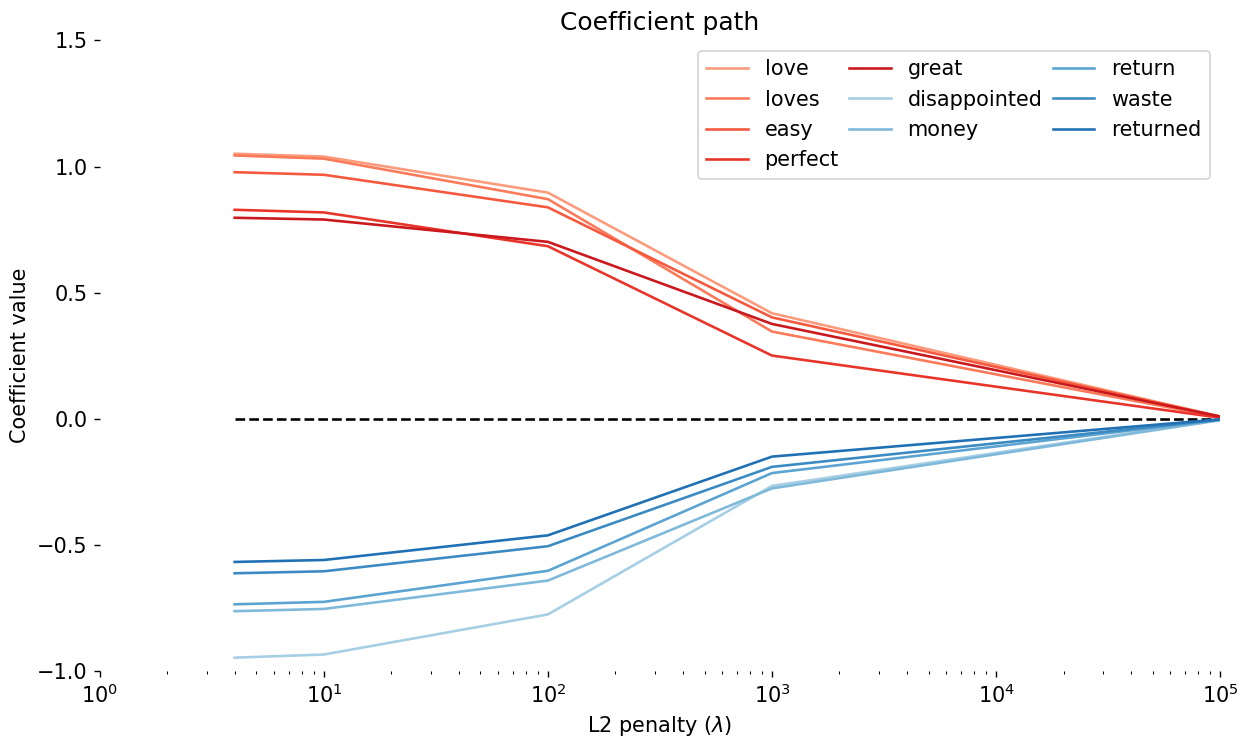

In [251]:
l2_list=[0,4,10,1e2,1e3,1e5]
def make_coeff_plot(pos_words, neg_words, l2_list):
    fig, ax= plt.subplots()
    plt.rcParams['figure.figsize'] = 10, 6

    xx=l2_list
    ax.plot(xx, [0.]*len(xx), "--", c="k")

    cmap_pos=plt.get_cmap("Reds")
    cmap_neg=plt.get_cmap("Blues")

    for i in range(len(pos_words)):
        color=cmap_pos(0.6*((i+2)/(len(pos_words)*1.2)+0.25))
        ax.plot(xx, pos_words.iloc[i][1:], label=pos_words.iloc[i][0], color=color)
    
    for i in range(len(neg_words)):
        color=cmap_neg(0.6*((i+2)/(len(neg_words)*1.2)+0.25))
        ax.plot(xx, neg_words.iloc[i][1:], label=neg_words.iloc[i][0],color=color)
    
    
    plt.legend(loc='best', ncol=3, prop={'size':12}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 1.5])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 6})
    plt.tight_layout()
    
    for spine in ax.spines.values():
        spine.set_visible(False)
    
make_coeff_plot(pos_words, neg_words, l2_list=[0, 4, 10, 1e2, 1e3, 1e5])

# Accuracy score

In [235]:
def accuracy(feature_matrix, sentiment, coeff,):
    
    scores=pd.DataFrame(np.dot(feature_matrix, coeff), columns=["score"])
    prediction_thresh=scores["score"].apply(lambda x: 1 if x>0 else -1)
    correct= (prediction_thresh == sentiment).sum()
    accuracy= correct/float(len(sentiment))

    return accuracy

In [236]:
train_accuracy={}
train_accuracy[0]=accuracy(feature_matrix_train, sentiment_train, l2_0 )
train_accuracy[4]=accuracy(feature_matrix_train, sentiment_train, l2_4 )
train_accuracy[10]=accuracy(feature_matrix_train, sentiment_train, l2_10 )
train_accuracy[1e2]=accuracy(feature_matrix_train, sentiment_train, l2_1e2 )
train_accuracy[1e3]=accuracy(feature_matrix_train, sentiment_train, l2_1e3 )
train_accuracy[1e5]=accuracy(feature_matrix_train, sentiment_train, l2_1e5 )

In [237]:
valid_accuracy={}
valid_accuracy[0]=accuracy(feature_matrix_valid, sentiment_valid, l2_0 )
valid_accuracy[4]=accuracy(feature_matrix_valid, sentiment_valid, l2_4 )
valid_accuracy[10]=accuracy(feature_matrix_valid, sentiment_valid, l2_10 )
valid_accuracy[1e2]=accuracy(feature_matrix_valid, sentiment_valid, l2_1e2 )
valid_accuracy[1e3]=accuracy(feature_matrix_valid, sentiment_valid, l2_1e3 )
valid_accuracy[1e5]=accuracy(feature_matrix_valid, sentiment_valid, l2_1e5 )

## Report

In [252]:
for key in sorted(list(valid_accuracy.keys())):
    print(("L2 penalty = {}".format(key)))
    print(( "Train accuracy = {:.4f}, Validation accuracy = {:.4f}".format(train_accuracy[key],valid_accuracy[key])))
    print("--------------------------------------------------------------------------------")

L2 penalty = 0
Train accuracy = 0.7852, Validation accuracy = 0.7814
--------------------------------------------------------------------------------
L2 penalty = 4
Train accuracy = 0.7851, Validation accuracy = 0.7815
--------------------------------------------------------------------------------
L2 penalty = 10
Train accuracy = 0.7850, Validation accuracy = 0.7817
--------------------------------------------------------------------------------
L2 penalty = 100.0
Train accuracy = 0.7840, Validation accuracy = 0.7811
--------------------------------------------------------------------------------
L2 penalty = 1000.0
Train accuracy = 0.7759, Validation accuracy = 0.7714
--------------------------------------------------------------------------------
L2 penalty = 100000.0
Train accuracy = 0.6804, Validation accuracy = 0.6678
--------------------------------------------------------------------------------
